In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
dt=pd.read_csv("/content/Titanic-Dataset.csv")

In [ ]:
dt=dt.drop(["Name","Ticket","Cabin","PassengerId"],axis=1)
dt=dt.dropna()

In [ ]:
dum1=pd.get_dummies(dt["Sex"],prefix="Gender: ")
dum2=pd.get_dummies(dt["Embarked"],prefix="Embarked: ")
dt=pd.concat([dt,dum1,dum2],axis=1)
dt=dt.drop(["Sex","Embarked"],axis=1)
dt.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender: _female,Gender: _male,Embarked: _C,Embarked: _Q,Embarked: _S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
scaler=StandardScaler()
#to_numpy converts dataframe to array
#reshape(-1,1) converts array into [n,1] where -1 indicates any number depends upon the array
#could have used scaled_age=scaler.fit_transform(dt[["Age"]]) and dt["scaled_age"]=scaled_age
scaled_age=scaler.fit_transform(dt["Age"].to_numpy().reshape(-1,1))
dt["scaled_age"]=scaled_age.reshape(-1)
scaled_fare=scaler.fit_transform(dt["Fare"].to_numpy().reshape(-1,1))
dt["scaled_fare"]=scaled_fare.reshape(-1)
dt=dt.drop(["Age","Fare"],axis=1)
dt.head()

,Survived,Pclass,SibSp,Parch,Gender: _female,Gender: _male,Embarked: _C,Embarked: _Q,Embarked: _S,scaled_age,scaled_fare
0,0,3,1,0,0,1,0,0,1,-0.527669,-0.516380
1,1,1,1,0,1,0,1,0,0,0.577094,0.694046
2,1,3,0,0,1,0,0,0,1,-0.251478,-0.503620
3,1,1,1,0,1,0,0,0,1,0.369951,0.350326
4,0,3,0,0,0,1,0,0,1,0.369951,-0.501257


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(dt.drop(["Survived"],axis=1),dt["Survived"],test_size=0.3,random_state=42)
model=linear_model.LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
y_pred=model.predict_proba(xtest)[:,1]>0.55
y_pred=y_pred.astype(int)
accuracy=accuracy_score(ytest,y_pred)
print(accuracy*100)
print("Confusion Matrix for threshold 0.55:\n", confusion_matrix(ytest, y_pred))

81.30841121495327
Confusion Matrix for threshold 0.55:
 [[110  12]
 [ 28  64]]


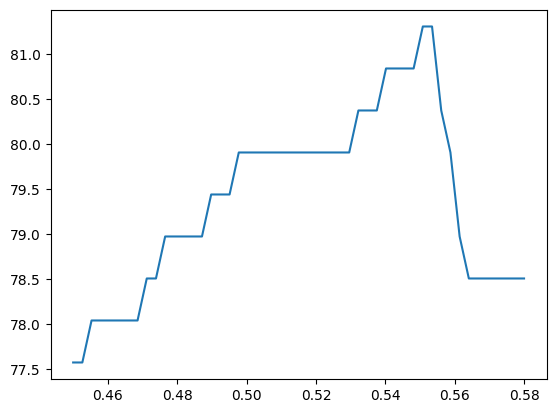

81.30841121495327
0.5508163265306122


In [ ]:
threshold=np.linspace(0.45,0.58,50)
acclist=[]
for i in threshold:
  y_pred=model.predict_proba(xtest)[:,1]>i
  y_pred=y_pred.astype(int)
  acclist.append(accuracy_score(ytest,y_pred)*100)
plt.plot(threshold,acclist)
plt.show()
print(max(acclist))
print(threshold[acclist.index(max(acclist))])

In [ ]:
#RandomForestClassifier for various hyperparameters
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid,
                           cv=5)
grid_search.fit(xtrain,ytrain)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=6,
                       n_estimators=25)


In [ ]:
#Chose the best hyperparameters
model_random = RandomForestClassifier(max_depth=6,
                                      max_features=None,
                                      max_leaf_nodes=6,
                                      n_estimators=25)
model_random.fit(xtrain, ytrain)
y_pred_rand = model_random.predict(xtest)
print(accuracy_score(y_pred_rand, ytest))

0.794392523364486


In [ ]:
param_grid = {'max_features': [None,'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(xtrain, ytrain)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=8,
                       max_features='sqrt')


In [ ]:
model_random = DecisionTreeClassifier(max_depth=8,
                                      max_features='sqrt',
                                      ccp_alpha=0.01,
                                      criterion='entropy')
model_random.fit(xtrain, ytrain)
y_pred_rand = model_random.predict(xtest)
print(accuracy_score(y_pred_rand, ytest))

0.7383177570093458
